# YOLOV8物件偵測訓練＆應用

## YOLOV8套件安裝＆測試

In [1]:
%pip install -U ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 kB 10.9 MB/s eta 0:00:00


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.187 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


## 載入YOLOv8模型
一共有3種載入方法

In [3]:
from ultralytics import YOLO

# Load a model
# 第一種：載入模型，不載入權重，跟新的一樣
model = YOLO('yolov8n.yaml')  # build a new model from YAML
# 第二種：載入模型+權重（適用同時保存模型與權重的方案）
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
# 第三種：載入模型+權重（適用模型與權重分開儲存的方案）
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights




                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

## 模型訓練
沒有錯！就只有一行而已  
訓練時的各種參數都在這一行程式下，相關參數可以到YOLOV8文檔中查找
[https://docs.ultralytics.com/usage/cfg/#predict](https://docs.ultralytics.com/usage/cfg/#predict)

另外在製作訓練資料時，可以參考coco8的檔案放置格式，其中label格式為YOLO格式（使用labelimg工具，選擇yolo格式即可）

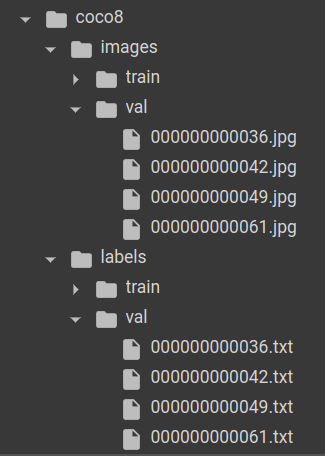

In [4]:
# Train the model
results = model.train(data='coco8.yaml', epochs=10, imgsz=640)

Ultralytics YOLOv8.0.187 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=coco8.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int

## 測試模型效能


In [7]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
#以下為顯示各map指數
metrics.box.map    # map50-95
#metrics.box.map50  # map50
#metrics.box.map75  # map75
#metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.187 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]
                   all          4         17      0.625      0.701      0.748      0.551
                person          4         10      0.599        0.5      0.478      0.208
                   dog          4          1      0.352      0.704      0.497      0.348
                 horse          4          2      0.699          1      0.995      0.698
              elephant          4          2          1          0      0.527      0.161
              umbrella          4          1      0.546          1      0.995      0.995
          potted plant          4          1      0.552          1      0.995      0.895
Speed: 0.3ms preproce

0.5510923298550154

# 使用模型進行推論

使用model進行推論後會得到results  
其中results的格式為  
[result0,result1,.....]  
如果只有一張圖的情況下.....  
1. 畫框
```python
img = results[0].plot(img=results[0].orig_img)
```
2. 取得物件框資訊
```
detect_result = results[0].boxes.data.to('cpu')
```
* 注意yolov8是由pytorch編寫，使用辨識物件後結果仍存放在gpu中，需要在拉回來
* data的格式為  
```
[[x0,y0,x1,y1,conf,cls]....]
0 ：物件框左上角
1 :物件框右下角
```


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 3 persons, 1 bus, 1 stop sign, 10.2ms
Speed: 4.8ms preprocess, 10.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)


tensor([[1.5502e+01, 2.3153e+02, 7.9194e+02, 7.4718e+02, 9.0607e-01, 5.0000e+00],
        [6.7161e+02, 3.7703e+02, 8.1000e+02, 8.7422e+02, 8.9128e-01, 0.0000e+00],
        [4.8512e+01, 3.9829e+02, 2.4466e+02, 9.0212e+02, 8.8370e-01, 0.0000e+00],
        [2.2173e+02, 4.0568e+02, 3.4484e+02, 8.5752e+02, 8.5190e-01, 0.0000e+00],
        [7.2375e-02, 2.5402e+02, 3.2280e+01, 3.2507e+02, 4.1186e-01, 1.1000e+01]], device='cuda:0')


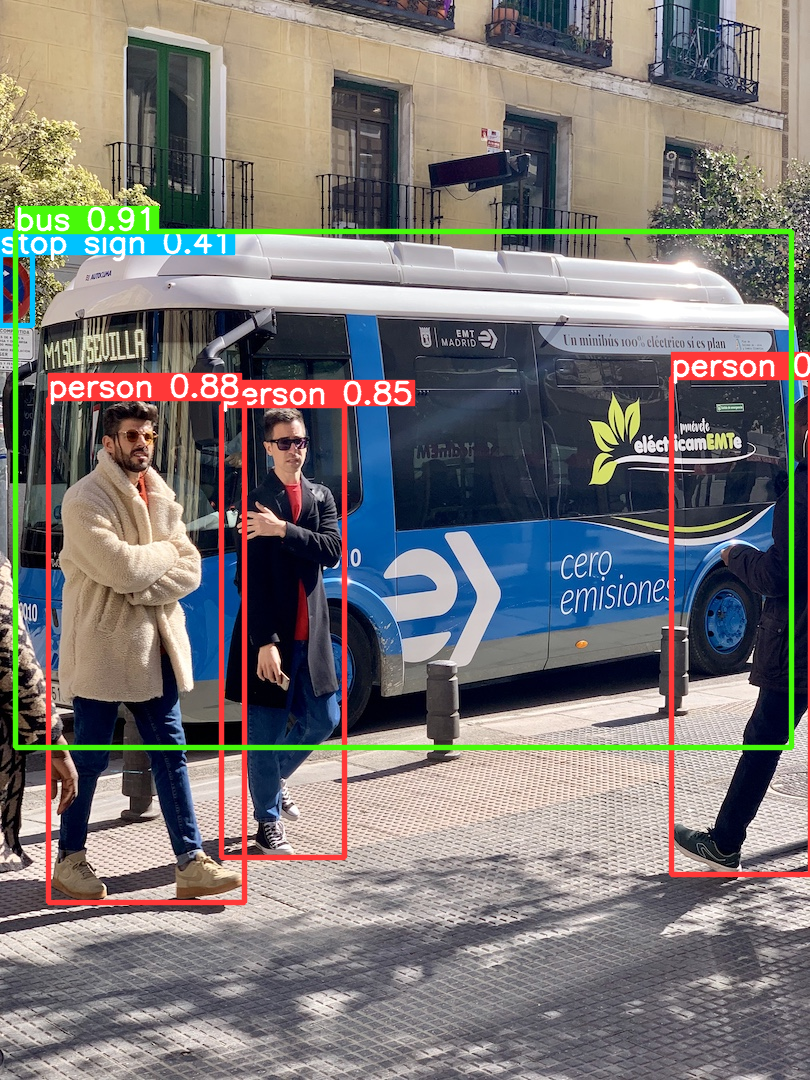

In [17]:
from google.colab.patches import cv2_imshow
import cv2
#模型推論，後面的conf 為信心指數
#第一個參數為圖片，可以是網址，位置，nparray
results = model('https://ultralytics.com/images/bus.jpg',conf=0.4)  # predict on an image
#使用cv2讀取圖片，在進行偵測
#origin_img = cv2.imread('/content/bus.jpg')
#results = model(origin_img,conf=0.4)  # predict on an image
for b in results:
    img = b.plot(img=b.orig_img)
   #顯示結果
print(b.boxes.data)
cv2_imshow(img)